##  描述

- 这里我们用线性回归实现多项式拟合，这样就可以实现简单的非线性拟合了
- 注：这里没有考虑性能上的优化，如特征的归一化，读者可自行试验 ~~

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

### 模拟数据

- 模拟数据的内在模式是： $y = x^2 $, 通过加入随机噪声即得到模拟数据

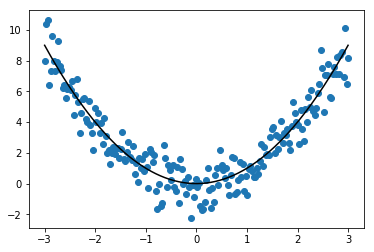

In [118]:
np.random.seed(20180824)
m = 200

x = np.linspace(-3, 3, m).reshape(m,1)
y = x**2 + np.random.randn(m,1)

_ = plt.scatter(x, y)
_ = plt.plot(x, x**2, 'Black')

### 损失函数和梯度函数

- 这是实现的主要工作，定义我们的损失函数和梯度函数
- 损失函数是 $$Loss(\theta, X) =  \frac{1}{2m}\sum_{i = 1}^m[h_\theta(x^{(i)}) - y^{(i)}]^2$$
- 梯度函数是 $$ \frac{\partial}{\partial \theta_j} Loss(\theta, X) = \frac{1}{m}\sum_{i = 1}^m[h_\theta(x^{(i)}) - y^{(i)}]x_j^{(i)}$$
- 这里基本的优化就是把循环求和操作向量化：
- $$Loss(\theta, X) =  \frac{1}{2m}[h_\theta(X) - y]^T[h_\theta(X) - y]$$
- $$\nabla  Loss(\theta, X) = \frac{1}{m}X^T[h_\theta(X) - y]$$


In [77]:
def loss_func(X, y, theta):
    loss = np.dot(X, theta) - y
    ridge = np.dot(theta, theta)
    return 1./(2*m) * np.dot(loss.T, loss) + ridge

def grad_func(X, y, theta):
    loss = np.dot(X, theta) - y
    return 1./m * np.dot(X.T, loss) + 2*theta

### 生成多项式特征矩阵

- 这一部分就是实现非线性拟合的关键，这里我们通过不同的最高次幂可以得到不同的多项式特征矩阵
- 例如，当$n = 2,\quad x = (x_1, x_2, ..., x_m)^T$ 时
- 我们可以得到多项式特征矩阵：
$$\left [ \begin{array}{c c c}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_m & x_m^2
\end{array} \right ]$$

In [78]:
def X_poly(x, n):
    tx = x
    X = np.ones((m, n+1))
    for i in range(1, n+1):
        X[:,i] = tx.reshape(m)
        tx = tx*x
    return X

### 训练算法

- 这里我们设置训练相关的参数，同时初始化参数向量和生成特征矩阵
- 然后进行迭代训练，同时可视化训练过程：迭代次数越多的拟合曲线红色越深，黑色曲线代表数据的内在模式
- 我们能看到，随着迭代加深，我们训练出来的曲线与内在模式越来越拟合

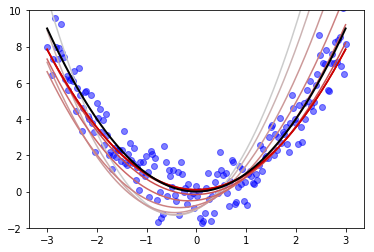

In [120]:
np.random.seed(20180824)

n = 2
alpha = 0.01
accuracy = 1e-6

i = 1
index = 1
c = np.array([0.8, 0.8, 0.8])

X = X_poly(x, n)
theta = np.random.randn(n+1, 1)
grad = grad_func(X, y, theta)

while not np.all(abs(grad) <= accuracy):
    theta = theta - alpha*grad
    grad = grad_func(X, y, theta)
    i = i+1
#     if i > 1e3:
#         break
    if i%index == 0:
        _ = plt.plot(x, np.dot(X, theta), color=c)
        index = index*2
        c = c - [0., 0.1, 0.1]

_ = plt.scatter(x, y, alpha=0.5, color='b')
_ = plt.ylim(-2, 10)
_ = plt.plot(x, x**2, 'Black', lw=2)
# print(" t0: {0[0]:.4f} \n t1: {0[1]:.4f} \n t2: {0[2]:.4f}".format(theta.ravel()))